In [1]:
from IPython.display import Audio, Image, YouTubeVideo

# LESSON 11: Requests & Responses

## CHAPTER 1: Introduction

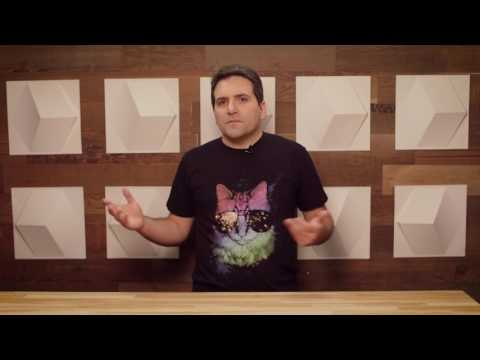

In [2]:
id = '6unC6bBWuKE'
YouTubeVideo(id=id, width=600)

### Introduction: HTTP and Web Servers

Welcome to our course on HTTP and Web Servers! In this course, you'll learn how web servers work. You'll write web services in Python, and you'll also write code that accesses services out on the web.

This course isn't about installing Apache on a Linux server, or uploading HTML files to the cloud. It's about how the protocol itself works. The examples you'll build in this course are meant to illustrate the low-level behaviors that higher-level web frameworks and services are built out of.

### Getting started
You'll be using the command line a lot in this course. A lot of the instructions in this course will ask you to run commands on the terminal on your computer. You can use any common terminal program —

* On Windows 10, you can use the **bash** shell in [Windows Subsystem for Linux](https://docs.microsoft.com/en-us/windows/wsl/install-win10).
* On earlier versions of Windows, you can use the **Git Bash** terminal program from [Git](https://git-scm.com/download/win).
* On Mac OS, you can use the built-in **Terminal** program, or another such as **iTerm**.
* On Linux, you can use any common terminal program such as **gnome-terminal** or **xterm**.

### Python 3
This course will not use a VM (virtual machine). Instead, you will be running code directly on your computer. This means you will need to have **Python** installed on your computer. The code in this course is built for Python 3, and will not all work in Python 2.

* **Windows and Mac**: Install it from python.org: https://www.python.org/downloads/
* **Mac (with Homebrew)**: In the terminal, run ``brew install python3``
* **Debian/Ubuntu/Mint**: In the terminal, run ``sudo apt-get install python3``

Open a terminal and check whether you have Python installed:
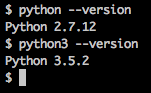
Checking Python versions with the ``--version`` option.


>
>    *Depending on your system, the Python 3 command may be called ``python`` or ``python3``. Take a moment to check! Due to changes in the language, the examples in this course will not work in Python 2.*
>
>    *In the screenshot above, the ``python`` command runs Python 2.7.12, while the ``python3`` command runs Python 3.5.2. In that situation, we'd want to use ``python3`` for this course.*
>

### Interactive Python

You should be familiar with the Python interactive interpreter. When you see code examples with the ``>>>`` prompt in this course, those are things you can try out in Python on your own computer. For instance:
```python
>>> from urllib.parse import urlparse
>>> urlparse("https://classroom.udacity.com/courses/ud303").path
'/courses/ud303'
```

### Git
You will need to have the ``git`` version control software installed. If you don't have it already, you can download it from https://git-scm.com/downloads.

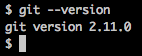
Checking that ``git`` is installed, by running ``git --version`` in the terminal.

You'll be using Git to download course materials from the Github repository https://github.com/udacity/course-ud303. (You don't need to do this yet.) You'll also use it as part of an exercise on deploying a server to a hosting provider.

#### Nmap
You'll also need to install ``ncat``, which is part of the __Nmap__ network testing toolkit. We'll be using ``ncat`` to investigate how web servers and browsers talk to each other.

* __Windows__: Download and run https://nmap.org/dist/nmap-7.30-setup.exe
* __Mac (with Homebrew)__: In the terminal, run ``brew install nmap``
* __Mac (without Homebrew)__: Download and install https://nmap.org/dist/nmap-7.30.dmg
* __Debian/Ubuntu/Mint__: In the terminal, run ``sudo apt-get install nmap``

To check whether ``ncat`` is installed and working, open up two terminals. In one of them, run ``ncat -l 9999`` then in the other, ``ncat localhost 9999``. Then type something into each terminal and press Enter. You should see the message on the opposite terminal:

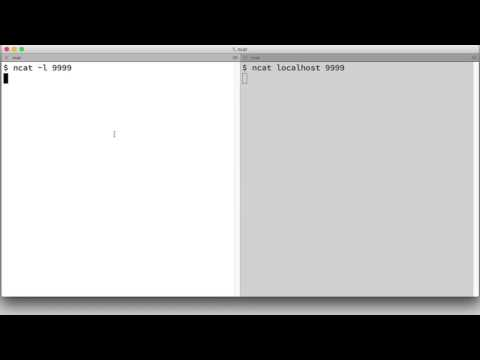

In [3]:
id = 'qeQ6pKxUp-Q'
YouTubeVideo(id=id, width=600)

What's going on here? Well, one of the ``ncat`` programs is acting as a very simple network server, and the other is acting as a client.
>
>    *__Note__: If you get an error such as "Address already in use", this means that another program on your computer is using port 9999. You can pick another port number and use it. Make sure to use the same port number on the server and client sides.*
>

To exit the ``ncat`` program, type Control-C in the terminal. If you exit the server side first, the client should automatically exit. This happens because the server ends the connection when it shuts down.

You'll be learning much more about the interaction between clients and servers throughout this course.

#### Install and test your software!
Before going on, check that you have all the software installed for this course.
* I have a __terminal program__ ready to use.
* I have __Python 3__ installed.
* I know whether Pyhton 3 is called ``python`` or ``python3`` on my computer
* I have __Git__ installed.
* I have installed the __Nmap__ toolkit
* I have tried out the ``ncat`` program in two terminals


## CHAPTER 2: Your first web server

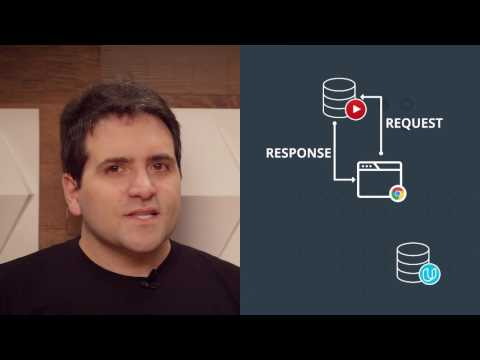

In [4]:
id = 'i86ViV0Gfrc'
YouTubeVideo(id=id, width=600)

### Your first web server

An HTTP transaction always involves a client and a server. You're using an HTTP client right now — your web browser. Your browser sends HTTP requests to web servers, and servers send responses back to your browser. Displaying a simple web page can involve dozens of requests — for the HTML page itself, for images or other media, and for additional data that the page needs.

HTTP was originally created to serve hypertext documents, but today is used for much more. As a user of the web, you're using HTTP all the time.

### Question 1 of 2

Which of these events are likely to cause an HTTP request to happen?

* Following a link on Google Search
* Saving a revision of a Wikipedia article
* Ordering a pizza using a smartphone ap

Did the pizza one surprise you? A lot of smartphone apps use HTTP under the hood to send requests and receive data. Web browsers are just the most common — and complicated — user interface for web technology. But browsers are not the only web client around. HTTP is powerful and widely supported in software, so it's a common choice for programs that need to talk to each other across the network, even if they don't look anything like a web browser.

### Exercise: Running your first web server
So what about the other end, the web server? Well, it turns out that a web server can actually be a lot simpler than a browser. Browsers have all this user interface and animation and graphics stuff going on. A server just needs to do one thing: handle incoming requests.

The Python ``http.server`` module can run a built-in web server on your computer. It's not a web app you'd publish to the world; it's a demonstration of Python's HTTP abilities. We'll be referring to this as the __demo server__ in this lesson.

So, let's get started with the demo web server.

Open up a terminal; ``cd`` to a directory that has some files in it — maybe a directory containing some text files, HTML files, or images — then run ``python3 -m http.server 8000`` in your terminal.

Here, I've run it in a directory containing some silly comics I drew:

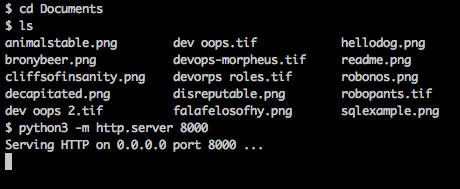
*Starting the demo server in the terminal. I've changed directories to my Documents directory, then run ``python3 -m http.server 8000``. The server tells me that it's serving HTTP on port 8000.*

When you start up the demo server, it will print a message telling you that it's serving HTTP. Leave it running, and leave the terminal open. Now try accessing http://localhost:8000/ from your browser. You should see something like this, although the file names you see will be different from mine:

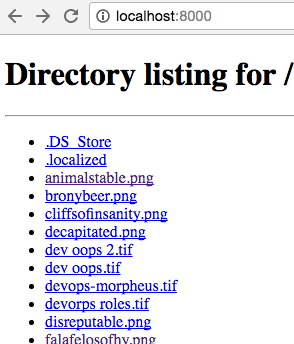
*Accessing http://localhost:8000/ in my web browser, I see the demo server showing the same files that are in my Documents directory.*

And that's the Python demo web server, running on your own computer. It serves up files on your local disk so you can look at them in your browser.

This may not seem like much of a big deal — after all, if you just wanted to access files on your local computer in your browser, you could use ``file://`` URIs. But the demo server is actually a web server. If you have another computer on the same local network, you could use it to access files served up by this server.

When you put ``localhost:8000`` in your browser, your browser sends an HTTP request to the Python program you're running. That program responds with a piece of data, which your browser presents to you. In this case, it's showing you a directory listing as a piece of HTML. Use your browser's developer tools to look at the HTML that it sends.
>
>    *__Note__: If you have a file called ``index.html`` in that directory, you'll see the contents of that file in your browser instead of the directory listing. Move that file somewhere else and reload the page, and you will see the directory listing like the one above.*
>

### Question 2 of 2
Keep the terminal with the Python web server running. What happens if you make up a web address that doesn't correspond to a file you actually have, like http://localhost:8000/NotExistyFile ?
Which of these behaviors do you get?
#### Answer:
*The browser gives an error response with a 404 error code, and the server keeps running.*

``404`` is the HTTP status code for "Not Found". On Highway 101, not far from the Udacity office in Mountain View, there's a sign that tells the distance to Los Angeles. As it happens, it's 404 miles from Mountain View to Los Angeles, so the sign says ``Los Angeles 404``. And so, every web programmer in Silicon Valley has probably heard the "Los Angeles Not Found" joke at least once.

### What's a server anyway?
A server is just a program that accepts connections from other programs on the network.

When you start a server program, it waits for clients to connect to it — like the demo server waiting for your web browser to ask it for a page. Then when a connection comes in, the server runs a piece of code — like calling a function — to handle each incoming connection. A connection in this sense is like a phone call: it's a channel through which the client and server can talk to each other. Web clients send requests over these connections, and servers send responses back.

Take a look in the terminal where you ran the demo server. You'll see a server log with an entry for each request your browser sent:
```
Serving HTTP on 0.0.0.0 port 8000 ...
127.0.0.1 - - [03/Oct/2016 13:47:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2016 13:47:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2016 13:48:06] "GET /falafelosofhy.png HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2016 13:49:23] code 404, message File not found
127.0.0.1 - - [03/Oct/2016 13:49:23] "GET /NotExistyFile HTTP/1.1" 404 -
```
Hey wow, what is all this stuff? There are some dates and times in there, but what's ``GET / HTTP/1.1``, or for that matter ``127.0.0.1``? And what's that ``200`` doing over there?

How do these things relate to the web address you put into your browser? Let's take a look at that next.

## CHAPTER 3: Parts of a URI

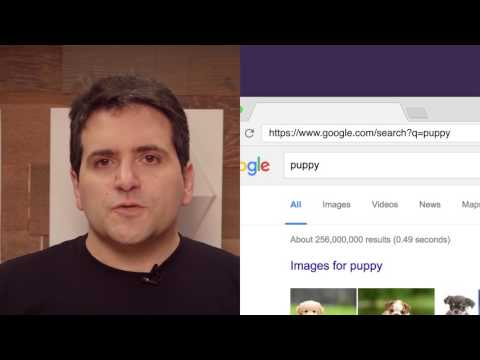

In [5]:
id = 'Rn7or5-CtME'
YouTubeVideo(id=id, width=600)

### Parts of a URI

A web address is also called a __URI__ for Uniform Resource Identifier. You've seen plenty of these before. From a web user's view, a URI is a piece of text that you put into your web browser that tells it what page to go to. From a web developer's view, it's a little bit more complicated.
>
>    *You've probably also seen the term __URL__ or Uniform Resource Locator. These are pretty close to the same thing; specifically, a URL is a URI for a resource on the network. Since URI is slightly more precise, we'll use that term in this course. But don't worry too much about the distinction.*
>

A URI is a name for a resource — such as this lesson page, or a Wikipedia article, or a data source like the Google Maps API. URIs are made out of several different parts, each of which has its own syntax. Many of these parts are optional, which is why URIs for different services look so different from one another.

Here is an example of a URI: ``https://en.wikipedia.org/wiki/Fish``

This URI has three visible parts, separated by a little bit of punctuation:

* ``https`` is the __scheme__;
* ``en.wikipedia.org`` is the __hostname__;
* and ``/wiki/Fish`` is the __path__.

Different URIs can have different parts; we'll see more below.

### Scheme
The first part of a URI is the __scheme__, which tells the client how to go about accessing the resource. Some URI schemes you've seen before include __http, https__, and __file__. File URIs tell the client to access a file on the local filesystem. HTTP and HTTPS URIs point to resources served by a web server.

HTTP and HTTPS URIs look almost the same. The difference is that when a client goes to access a resource with an HTTPS URI, it will use an encrypted connection to do it. Encrypted Web connections were originally used to protect passwords and credit-card transactions, but today many sites use them to help protect users' privacy. We'll look more into HTTPS near the end of this course.

There are many other URI schemes out there, though. You can take a look at the [official list](http://www.iana.org/assignments/uri-schemes/uri-schemes.xhtml)!

### Question 1 of 2
Which of these are real URI schemes actually used on the Web? Use your favorite search engine to do some research; see what you find!
#### Answer:
* mailto
* data
* magnet

### Hostname
In an HTTP URI, the next thing that appears after the scheme is a __hostname__ — something like ``www.udacity.com`` or ``localhost``. This tells the client which server to connect to.

You'll often see web addresses written as just a hostname in print. But in the HTML code of a web page, you can't write ``<a href="www.google.com">this</a>`` and get a working link to Google. A hostname can only appear after a URI scheme that supports it, such as ``http`` or ``https``. In these URIs, there will always be a ``://`` between the scheme and hostname.

We'll see more about hostnames later on in the lesson. By the way, not every URI has a hostname. For instance, a ``mailto`` URI just has an email address: ``mailto:spam@example.net`` is a well-formed mailto URI. This also reveals a bit more about the punctuation in URIs: the ``:`` goes after the scheme, but the ``//`` goes before the hostname. Mailto links don't have a hostname part, so they don't have a ``//``.


### Path
 
In an HTTP URI (and many others), the next thing that appears is the __path__, which identifies a particular resource on a server. A server can have many resources on it — such as different web pages, videos, or APIs. The path tells the server which resource the client is looking for.

On the demo server, the paths you see will correspond to files on your filesystem. But that's just the demo server. In the real world, URI paths don't necessarily equate to specific filenames. For instance, if you do a Google search, you'll see a URI path such as ``/search?q=ponies``. This doesn't mean that there's literally a file on a server at Google with a filename of ``search?q=ponies``. The server interprets the path to figure out what resource to send. In the case of a search query, it sends back a search result page that maybe never existed before.

When you write a URI without a path, such as ``http://udacity.com``, the browser fills in the default path, which is written with a single slash. That's why ``http://udacity.com`` is the same as ``http://udacity.com/`` (with a slash on the end).

The path written with just a single slash is also called the __root__. When you look at the root URI of the demo server — ``http://localhost:8000/`` — you're not looking at the root of your computer's whole filesystem. It's just the root of the resources served by the web server. The demo server won't let a web browser access files outside the directory that it's running in.

### Question 2 of 2
Here is a URI: ``http://example.net/google.com/ponies``
What is the hostname in this URI?
#### Answer:
example.net


### Relative URI references

Take a look at the HTML source for the demo server's root page. Find one of the ``<a>`` tags that links to a file. In mine, I have a file called ``cliffsofinsanity.png``, so there's an ``<a> ``tag that looks like this:
```html
<a href="cliffsofinsanity.png">cliffsofinsanity.png</a>
```

URIs like this one don't have a scheme, or a hostname — just a path. This is a __relative URI reference__. It's "relative" to the context in which it appears — specifically, the page it's on. This URI doesn't include the hostname or port of the server it's on, but the browser can figure that out from context. If you click on one of those links, the browser knows from context that it needs to fetch it from the same server that it got the original page from.

### Other URI parts
There are many other parts that can occur in a URI. Consider the difference between these two Wikipedia URIs:

* https://en.wikipedia.org/wiki/Oxygen
* https://en.wikipedia.org/wiki/Oxygen#Discovery

If you follow these links in your browser, it will fetch the same page from Wikipedia's web server. But the second one displays the page scrolled to the section about the discovery of oxygen. The part of the URI after the ``#`` sign is called a __fragment__. The browser doesn't even send it to the web server. It lets a link point to a specific named part of a resource; in HTML pages it links to an element by id.

In contrast, consider this Google Search URI:

* https://www.google.com/search?q=fish

The ``?q=fish`` is a __query__ part of the URI. This does get sent to the server.

There are a few other possible parts of a URI. For way more detail than you need for this course, take a look at this Wikipedia article:

   * https://en.wikipedia.org/wiki/Uniform_Resource_Identifier#Generic_syntax

(Hey, look, it's another fragment ID!)


## CHAPTER 4: Hostnames and ports

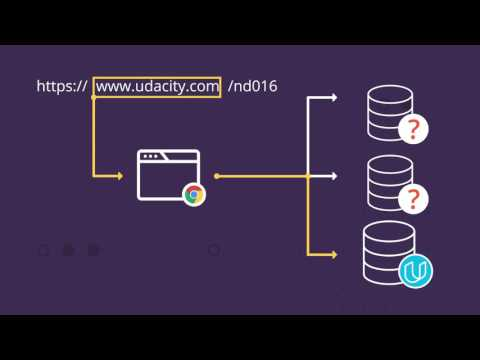

In [6]:
id = 'biNnHVUDzzA'
YouTubeVideo(id=id, width=600)

### Hostnames

A full HTTP or HTTPS URI includes the hostname of the web server, like ``www.udacity.com`` or ``www.un.int`` or ``www.cheeseboardcollective.coop`` (my favorite pizza place in the world, in Berkeley CA). A hostname in a URI can also be an IP address: for instance, if you put http://216.58.194.174/ in your browser, you'll end up at Google.
>
>    Why is it called a __host__name? In network terminology, a __host__ is a computer on the network; one that could __host__ services.
>

The Internet tells computers apart by their __IP addresses__; every piece of network traffic on the Internet is labeled with the IP addresses of the sending and receiving computers. In order to connect to a web server such as ``www.udacity.com``, a client needs to translate the hostname into an IP address. Your operating system's network configuration uses the Domain Name Service (DNS) — a set of servers maintained by Internet Service Providers (ISPs) and other network users — to look up hostnames and get back IP addresses.

In the terminal, you can use the __host__ program to look up hostnames in DNS:

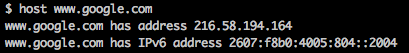
In the terminal, I looked up the name "www.google.com" using the ``host `` command.
The output shows both an IPv4 address and an IPv6 address.

Some systems don't have the ``host`` command, but do have a similar command called ``nslookup``. This command also displays the IP address for the hostname you give it; but it also shows the IP address of the DNS server that's giving it the answer:

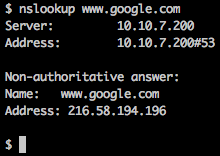
Here, I'm using the ``nslookup`` command to look up the name ``www.google.com``.
``nslookup`` displays the DNS server's address first, then the result from that server.

### Question 1 of 3
Use the host or nslookup command to find the IPv4 address for the name localhost. What is it?
#### Answer:
127.0.0.1

IP addresses come in two different varieties: the older __IPv4__ and the newer __IPv6__. When you see an address like ``127.0.0.1`` or ``216.58.194.164``, those are IPv4 addresses. IPv6 addresses are much longer, such as ``2607:f8b0:4005:804::2004``, although they can also be abbreviated.

### Localhost
The IPv4 address ``127.0.0.1`` and the IPv6 address ``::1`` are special addresses that mean "this computer itself" — for when a client (like your browser) is accessing a server on your own computer. The hostname ``localhost`` refers to these special addresses.

When you run the demo server, it prints a message saying that it's listening on ``0.0.0.0``. This is not a regular IP address. Instead, it's a special code for "every IPv4 address on this computer". That includes the ``localhost`` address, but it also includes your computer's regular IP address.


### Question 2 of 3
Use the ``host`` or ``nslookup`` command to find the IPv4 addresses of ``en.wikipedia.org`` and ``ja.wikipedia.org`` — the servers for Wikipedia in English and Japanese.

Are these sites on the same IP address?
#### Answer:
Yes, they are on the same IP address.

### Ports
When you told your browser to connect to the demo server, you gave it the URI ``http://localhost:8000/``. This URI has a port number of ``8000``. But most of the web addresses you see in the wild don't have a port number on them. This is because the client usually figures out the port number from the URI scheme.

For instance, HTTP URIs imply a port number of ``80``, whereas HTTPS URIs imply a port number of ``443``. Your Python demo web server is running on port 8000. Since this isn't the default port, you have to write the port number in URIs for it.

__What's a port number, anyway?__ To get into that, we need to talk about how the Internet works. All of the network traffic that computers send and receive — everything from web requests, to login sessions, to file sharing — is split up into messages called __packets__. Each packet has the IP addresses of the computer that sent it, and the computer that receives it. And (with the exception of some low-level packets, such as ping) it also has the __port number__ for the sender and recipient. IP addresses distinguish computers; port numbers distinguish programs on those computers.

We say that a server "listens on" a port, such as 80 or 8000. "Listening" means that when the server starts up, it tells its operating system that it wants to receive connections from clients on a particular port number. When a client (such as a web browser) "connects to" that port and sends a request, the operating system knows to forward that request to the server that's listening on that port.
>
>    Why do we use port 8000 instead of 80 for the demo server? For historical reasons, operating systems only allow the administrator (or root) account to listen on ports below 1024. This is fine for production web servers, but it's not convenient for learning.
>

### Question 3 of 3
Which of the URIs below refers to the same resource as ``https://en.wikipedia.org/wiki/Fish?``
#### Answer:
``https://en.wikipedia.org:443/wiki/Fish``


## CHAPTER 5: HTTP GET requests

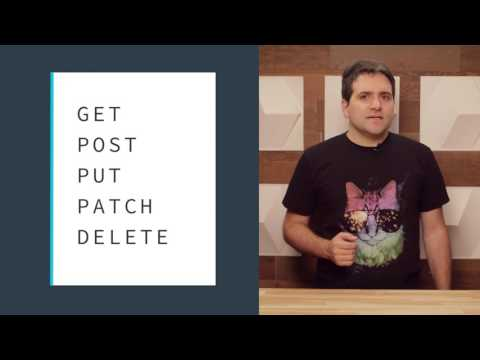

In [7]:
id = 'XLB8ZPdyRdU'
YouTubeVideo(id=id, width=600)

### HTTP GET requests

Take a look back at the server logs on your terminal, where the demo server is running. When you request a page from the demo server, an entry appears in the logs with a message like this:
```
127.0.0.1 - - [03/Oct/2016 15:45:50] "GET /readme.png HTTP/1.1" 200 -
```
Take a look at the part right after the date and time. Here, it says ``"GET /readme.png HTTP/1.1"``. This is the text of the __request line__ that the browser sent to the server. This log entry is the server telling you that it received a request that said, literally, ``GET /readme.png HTTP/1.1``.

This request has three parts.

The word ``GET`` is the __method__ or __HTTP verb__ being used; this says what kind of request is being made. ``GET`` is the verb that clients use when they want a server to send a resource, such as a web page or image. Later, we'll see other verbs that are used when a client wants to do other things, such as submit a form or make changes to a resource.

``/readme.png`` is the __path__ of the resource being requested. Notice that the client does not send the whole URI of the resource here. It doesn't say ``https://localhost:8000/readme.png``. It just sends the path.

Finally, ``HTTP/1.1`` is the __protocol__ of the request. Over the years, there have been several changes to the way HTTP works. Clients have to tell servers which dialect of HTTP they're speaking. HTTP/1.1 is the most common version today.

### Exercise: Send a request by hand
You can use ``ncat`` to connect to the demo server and send it an HTTP request by hand. (Make sure the demo server is still running!)

Try it out:
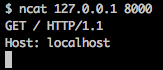
I used the command ``ncat 127.0.0.1 8000`` to connect to port 8000.
Then I typed out an HTTP request on the next two lines.

Use ncat ``127.0.0.1 8000`` to connect your terminal to the demo server.

Then type these two lines:
```
GET / HTTP/1.1
Host: localhost
```
After the second line, __press Enter twice__. As soon as you do, the response from the server will be displayed on your terminal. Depending on the size of your terminal, and the number of files the web server sees, you will probably need to __scroll up__ to see the beginning of the response!


### Quiz Question
Which of these things do you see in the server's response?
#### Answer:
* A line that ends with 200 OK.
* The date and time.
* A piece of HTML.


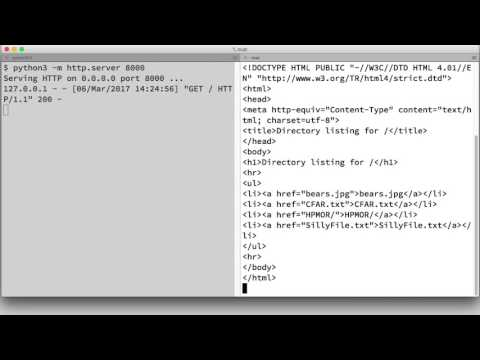

In [9]:
id = 'id3OkbFhrj4'
YouTubeVideo(id=id, width=600)

On the next page, we'll look at the parts of the HTTP response in detail.

## CHAPTER 6: HTTP responses

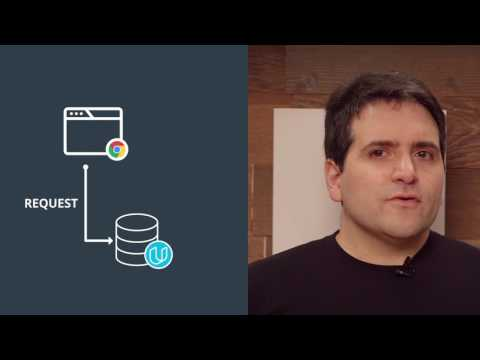

In [10]:
id = 'SDmocXPr6Jc'
YouTubeVideo(id=id, width=600)

### HTTP responses

Take another look at what you got back from the web server in the previous exercise.

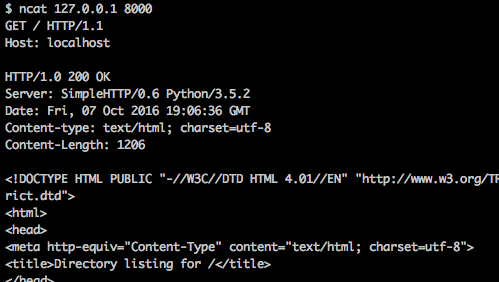
I connected to the demo server with ``ncat 127.0.0.1 8000``, then wrote out an HTTP request.
The server sent back an HTTP response.
Everything after the line ``Host: localhost`` is part of the server's response.

After you typed ``Host: localhost`` and pressed Enter twice, the server sent back a lot of text. This is an __HTTP response__. One of these exchanges — a request and response — is happening every time your browser asks a server for a page, an image, or anything else.

Here's another one to try. Use ``ncat`` to connect to ``google.com`` port 80, and send a request for the path ``/`` on the host ``google.com``:
```
GET / HTTP/1.1
Host: google.com
```
>
>    *Make sure to send ``Host: google.com`` exactly ... don't slip a ``www`` in there. These are actually different hostnames, and we want to take a look at the difference between them. And press Enter twice!*
>

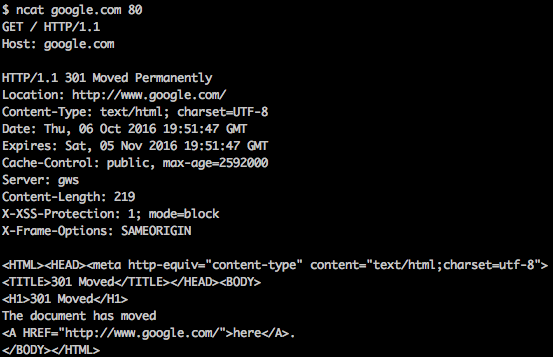
*I connected to google.com port 80 and sent an HTTP request.
Google's server sent back an HTTP response.*

The HTTP response is made up of three parts: the __status line__, some __headers__, and a __response body__.

The status line is the first line of text that the server sends back. The headers are the other lines up until the first blank line. The response body is the rest — in this case, it's a piece of HTML.


### Status line
In the response you got from your demo server, the status line said ``HTTP/1.0 200 OK``. In the one from Google, it says ``HTTP/1.1 301`` Moved Permanently. The status line tells the client whether the server understood the request, whether the server has the resource the client asked for, and how to proceed next. It also tells the client which dialect of HTTP the server is speaking.

The numbers 200 and 301 here are HTTP __status codes__. There are dozens of different status codes. The first digit of the status code indicates the general success of the request. As a shorthand, web developers describe all of the codes starting with __2__ as "__2xx__" codes, for instance — the x's mean "any digit".

* __1xx — Informational__. The request is in progress or there's another step to take.
* __2xx — Success__! The request succeeded. The server is sending the data the client asked for.
* __3xx — Redirection__. The server is telling the client a different URI it should redirect to. The headers will usually contain a Location header with the updated URI. Different codes tell the client whether a redirect is permanent or temporary.
* __4xx — Client error__. The server didn't understand the client's request, or can't or won't fill it. Different codes tell the client whether it was a bad URI, a permissions problem, or another sort of error.
* __5xx — Server error__. Something went wrong on the server side.

You can find out much more about HTTP status codes in this [Wikipedia article](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) or [in the specification for HTTP](https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html).

### Question 1 of 5
Look back at the response Google sent, specifically the status line and the first header line:
```
HTTP/1.1 301 Moved Permanently
Location: http://www.google.com/
```
What do you think Google's server wants the client to do?
#### Answer:
* Go to http://www.google.com/ instead of http://google.com/.

The server response here is an example of good user interface on the Web. Google wants browsers to use ``www.google.com`` instead of ``google.com``. But instead of showing the user an error message, they send a redirect. Browsers will automatically follow the redirect and end up on the right site.

### Headers
An HTTP response can include many __headers__. Each header is a line that starts with a keyword, such as ``Location`` or ``Content-type``, followed by a colon and a value. Headers are a sort of metadata for the response. They aren't displayed by browsers or other clients; instead, they tell the client various information about the response.

Many, many features of the Web are implemented using headers. For instance, __cookies__ are a Web feature that lets servers store data on the browser, for instance to keep a user logged in. To set a cookie, the server sends the ``Set-Cookie`` header. The browser will then send the cookie data back in a ``Cookie`` header on subsequent requests. You'll see more about cookies later in this course.

For the next quiz, take a look at the ``Content-type`` header sent by the Google server and the demo server. Both servers send the exact same value:
```
Content-type: text/html; charset=utf-8
```
What do you think this means?

### Question 2 of 5
What does the Content-type header sent by the two servers mean?
``Content-type: text/html; charset=utf-8``
#### Answer:
* The server is telling the client that the response body is an HTML document written in UTF-8 text.

A ``Content-type`` header indicates the kind of data that the server is sending. It includes a general category of content as well as the specific format. For instance, a PNG image file will come with the Content-type ``image/png``. If the content is text (including HTML), the server will also tell what encoding it's written in. UTF-8 is a very common choice here, and it's the default for Python text anyway.

Very often, the headers will contain more metadata about the response body. For instance, both the demo server and Google also send a ``Content-Length`` header, which tells the client how long (in bytes) the response body will be. If the server sends this, then the client can reuse the connection to send another request after it's read the first response. Browsers use this so they can fetch multiple pieces of data (such as images on a web page) without having to reconnect to the server.

### Response body
The headers end with a blank line. Everything after that blank line is part of the __response body__. If the request was successful (a ``200 OK`` status, for instance), this is a copy of whatever resource the client asked for — such as a web page, image, or other piece of data.

But in the case of an error, the response body is where the error message goes! If you request a page that doesn't exist, and you get a ``404 Not Found`` error, the actual error message shows up in the response body.


### Exercise: Be a web server!

Use ``ncat -l 9999`` to listen on port 9999. Connect to it with your web browser at http://localhost:9999/. What do you see in your terminal?
### Question 3 of 5
Use ``ncat -l 9999`` to listen on port 9999. Connect to it with your web browser at http://localhost:9999/. What do you see in your terminal?
#### Answer:
* An HTTP request that starts with "GET / HTTP/1.1".

Keep that terminal open!

Next, send an HTTP response to your browser by typing it into the terminal, right under where you see the headers the browser sent to you:
```
HTTP/1.1 307 Temporary Redirect
Location: https://www.eff.org/
```
At the end, __press Enter twice__ to send a blank line to mark the end of headers.


### Question 4 of 5
What happens in your browser after sending it the response described above?
#### Answer:
* It opens the web page of the Electronic Frontier Foundation (EFF).


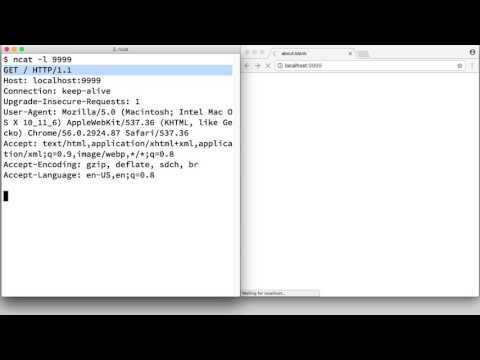

In [11]:
id = 'wW0Oq41T25U'
YouTubeVideo(id=id, width=600)

Do it again! Run ``ncat -l 9999`` to play a server, and get your browser to access it. But this time, instead of sending a 307 redirect, send a ``200 OK`` with a piece of text in it:
```
HTTP/1.1 200 OK
Content-type: text/plain
Content-length: 50

Hello, browser! I am a real HTTP server, honestly!
```
*(Remember the blank line between headers and body!)*

### Question 5 of 5

What happens in your browser after you send it the HTTP response with 200 OK?
#### Answer:
* It displays the message that you typed, in plain text

## CHAPTER 7: Congratulations!

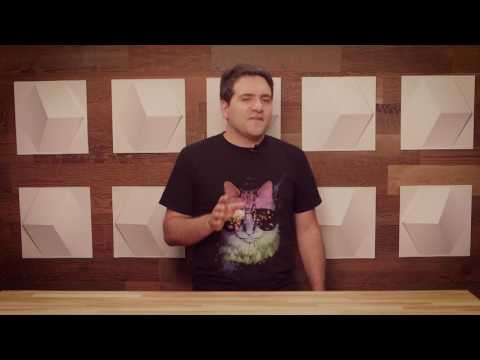

In [12]:
id = '9EWj5avKmMg'
YouTubeVideo(id=id, width=600)

### Congratulations!

You have demonstrated your ability to play the part of an HTTP client or server by hand. You can carry out conversations in HTTP with all manner of interesting clients and servers.

Fortunately, Python makes it much easier than this when building real web applications. Rather than sending and answering HTTP requests by hand, in the next lesson, you'll be writing Python code to do it for you.

### Downloadable exercises

In the next two lessons, you'll be doing several exercises involving running Python server code on your own computer. To get ready for these exercises, you'll need to download the starter code. To do this, open your terminal and run these commands:
```
git clone https://github.com/udacity/course-ud303
cd course-ud303
git remote remove origin
```
This will put your shell into a directory called ``course-ud303 `` containing the downloadable exercises. Take a look around at the subdirectories here. For each exercise, you'll be using one of them.

### Get ready!

To get ready for Lesson 2, download the exercise material and take a look around the exercises.
* ``git clone https://github.com/udacity/course-ud303
* `` cd course-ud303``
* ``git remote remove origin``
* I looked around in the subdirectories of ``course-ud303``

